# Decision Trees
### Objectives
 -- After completing this lab you will be able to:

- Develop a classification model using Decision Tree Algorithm
- Apply Decision Tree classification on a real world dataset.

## Introduction
* This lab explores decision tree classification, a powerful machine learning technique for making data-driven decisions. You will learn to build, visualize, and evaluate decision trees using a real-world dataset. The dataset used in this lab is that of Drug prediction based on the health parameters of a patient.

# Import Libraries

In [26]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## About the dataset
- Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Drug Y.

- Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are the Age, Sex, Blood Pressure, and Cholesterol of the patients, and the target is the drug that each patient responded to.

- It is a sample of a multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient or to prescribe a drug to a new patient.

# Downloading the Data

In [27]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(path)
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Data Analysis and pre-processing

In [28]:
my_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### This tells us that 4 out of the 6 features of this dataset are categorical, which will have to be converted into numerical ones to be used for modeling. For this, we can make use of LabelEncoder from the Scikit-Learn library.

In [29]:
label_encoder = LabelEncoder()
my_data["Sex"] = label_encoder.fit_transform(my_data["Sex"])
# print(my_data.head())
my_data["BP"] = label_encoder.fit_transform(my_data["BP"])
my_data["Cholesterol"] = label_encoder.fit_transform(my_data["Cholesterol"])
print(my_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB
None


With this, you now have 5 parameters that can be used for modeling and 1 feature as the target variable. 
We can see from comparison of the data before Label encoding and after it, to note the following mapping.
<br>
For parameter 'Sex' : $M \rightarrow 1, F \rightarrow 0$ <br>
For parameter 'BP' : $High \rightarrow 0, Low \rightarrow 1, Normal \rightarrow 2$<br>
For parameter 'Cholesterol' : $High \rightarrow 0, Normal \rightarrow 1$

### We need also check if there are any missing values in the dataset.

In [30]:
# Check missing value
my_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [31]:
# There is no missing value in datasets

### To evaluate the correlation of the target variable with the input features, it will be convenient to map the different drugs to a numerical value. Execute the following cell to achieve the same

In [37]:
custom_map = {
    "drugA": 0,
    "drugB": 1,
    "drugC": 2,
    "drugX": 3,
    "drugY": 4
}
my_data["Drug_num"] = my_data["Drug"].map(custom_map)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,drug_num,Drug_num
0,23,0,0,0,25.355,drugY,4,4
1,47,1,1,0,13.093,drugC,2,2
2,47,1,1,0,10.114,drugC,2,2
3,28,0,2,0,7.798,drugX,3,3
4,61,0,1,0,18.043,drugY,4,4
...,...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2,2
196,16,1,1,0,12.006,drugC,2,2
197,52,1,2,0,9.894,drugX,3,3
198,23,1,2,1,14.020,drugX,3,3


In [33]:
# We can now use the corr() function to find the correlation of the input variables with the target variable.

# Practice question

- Write the code to find the correlation of the input variables with the target variable and identify the features most significantly affecting the target.

In [38]:
my_data.drop('Drug',axis=1).corr()['Drug_num']

Age           -0.004828
Sex           -0.098573
BP             0.372868
Cholesterol    0.055629
Na_to_K        0.589120
drug_num       1.000000
Drug_num       1.000000
Name: Drug_num, dtype: float64

In [35]:
# This shows that the drug recommendation is mostly correlated with the Na_to_K and BP features

# We can also understand the distribution of the dataset by plotting the count of the records with each drug recommendation.

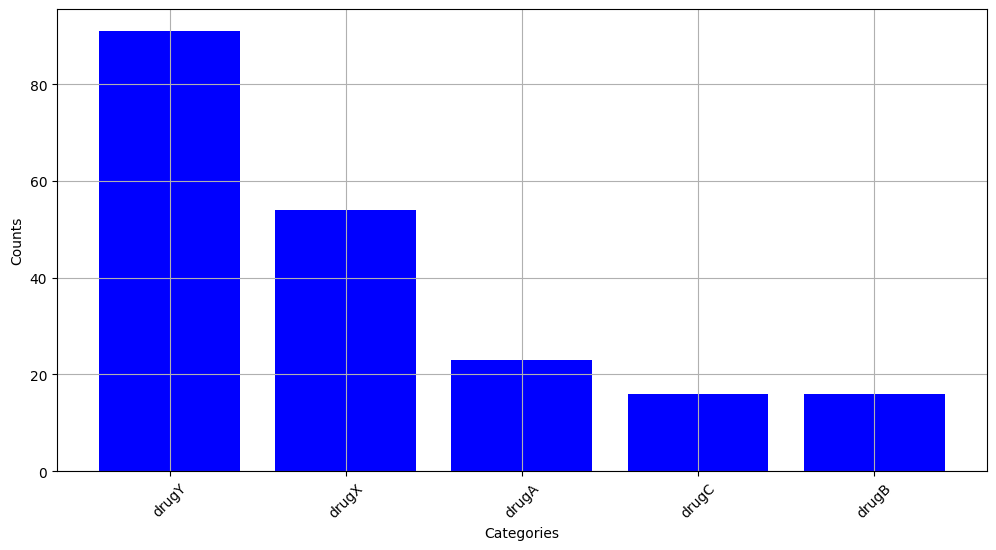

In [39]:
category_counts = my_data['Drug'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

### This shows us the distribution of the different classes, clearly indicating that Drug X and Drug Y have many more records in comparison to the other 3.

# Modeling

In [40]:
# Feature selection
X = my_data.drop(['Drug','Drug_num'], axis=1)

In [41]:
y = my_data['Drug']

In [42]:
# Split the data to train and test 
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=32)

In [44]:
# Model declare using Decision tree classifier
drug_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drug_tree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Evaluation

In [46]:
tree_prediction = drug_tree.predict(X_testset)

### We can now check the accuracy of our model by using the accuracy metric.

In [50]:
print("Decision Trees's Accuracy: ", round(metrics.accuracy_score(y_testset, tree_prediction), 2))

Decision Trees's Accuracy:  0.98


# Visualize the tree
- To understand the classification criteria derived by the Decision Tree, we may generate the tree plot.

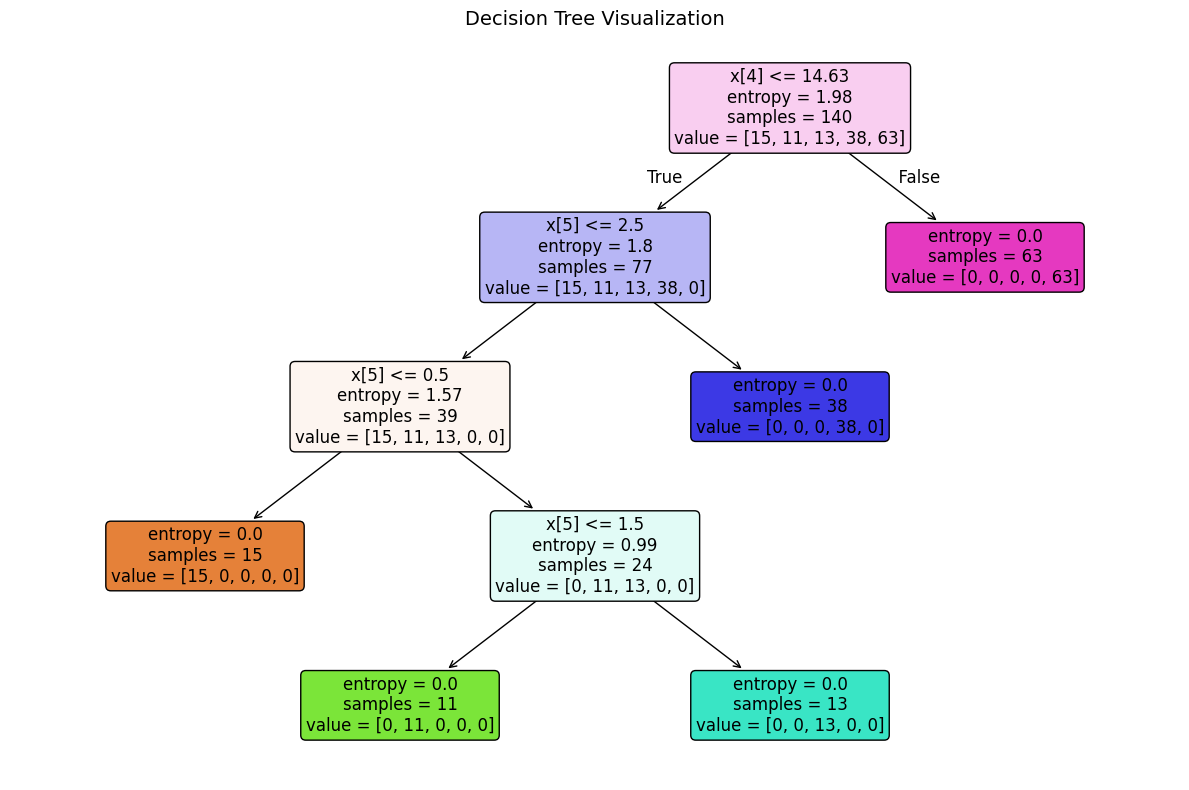

In [54]:
plt.figure(figsize=(12, 8))  # Set the size of the figure

plot_tree(
    drug_tree,               # Decision tree model
    filled=True,             # Fills nodes with color based on class
    rounded=True,            # Rounded corners on boxes
    fontsize=12,             # Font size of text inside the nodes
    precision=2              # Number of decimal places for impurity, etc.
)
plt.title("Decision Tree Visualization", fontsize=14)
plt.tight_layout()
plt.show()